In [1]:
features_csv_path = 'full_features.csv'
target_variable = 'grade'
drop_columns = ['id', 'grade', 'benchmark', 'start1', 'start2', 'end']

In [2]:
import numpy as np
import scipy.stats as sps
import pandas as pd
import metadata as md
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv(features_csv_path)
df.shape

(29181, 168)

In [4]:
df2 = pd.read_csv('umap_features_150_dim')

In [5]:
df3 = pd.concat([df,df2], axis = 1)
df3.shape

(29181, 319)

In [6]:
'''
df_train = df.loc[md.train_tf]
df_test = df.loc[md.text_df]

X_train = df_train.drop(columns = drop_columns).to_numpy()
y_train = df_train[target_variable].copy().values
X_test = df_test.drop(columns = drop_columns).to_numpy()
y_test = df_test[target_variable].copy().values
'''

'\ndf_train = df.loc[md.train_tf]\ndf_test = df.loc[md.text_df]\n\nX_train = df_train.drop(columns = drop_columns).to_numpy()\ny_train = df_train[target_variable].copy().values\nX_test = df_test.drop(columns = drop_columns).to_numpy()\ny_test = df_test[target_variable].copy().values\n'

In [7]:
#'''
X = df3.drop(columns = drop_columns).to_numpy()
y = df[target_variable].copy().values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2016, stratify = y)
#'''

In [8]:
grid_n_estimators = [100, 200, 300]
grid_max_depth = [2, 3, 4, 5]

reg_cv = xgb.XGBRegressor()
grid_cv = GridSearchCV(reg_cv, cv = 5, param_grid = {'n_estimators': grid_n_estimators, 'max_depth': grid_max_depth}, scoring = 'neg_mean_squared_error')

In [9]:
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
          

In [10]:
grid_cv.best_params_

{'max_depth': 2, 'n_estimators': 300}

In [11]:
grid_cv.cv_results_

{'mean_fit_time': array([0.59751763, 0.99553518, 1.34483132, 0.75534835, 1.27754951,
        1.81750245, 0.95142059, 1.71161509, 2.47877998, 1.25918708,
        2.26989989, 3.36022749]),
 'std_fit_time': array([0.0214777 , 0.0562731 , 0.0356377 , 0.02069673, 0.01626741,
        0.03472508, 0.01725263, 0.05252611, 0.06367944, 0.01046909,
        0.01550814, 0.05172603]),
 'mean_score_time': array([0.00773273, 0.00833359, 0.00891967, 0.00768876, 0.00856152,
        0.00952754, 0.00808578, 0.00869064, 0.01066246, 0.00845428,
        0.01019745, 0.01215081]),
 'std_score_time': array([0.0004652 , 0.00081198, 0.00121779, 0.00107508, 0.00101241,
        0.00063789, 0.00068424, 0.00096157, 0.00085824, 0.000488  ,
        0.00048602, 0.00135438]),
 'param_max_depth': masked_array(data=[2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=object

In [12]:
reg = xgb.XGBRegressor(**grid_cv.best_params_)

In [13]:
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [14]:
def acc_exact(actual, predicted):
    check = np.absolute(predicted - actual) <= 0.5
    return check.sum()/len(check)
def acc_within_one(actual, predicted):
    check = np.absolute(predicted - actual) <= 1.5
    return check.sum()/len(check)

In [15]:
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Accuracy rate (exact grade match):', acc_exact(y_test, y_pred))
print('Accuracy rate (within one grade):', acc_within_one(y_test, y_pred))

Mean squared error: 1.4109004195503725
Accuracy rate (exact grade match): 0.386499914339558
Accuracy rate (within one grade): 0.8173719376391982


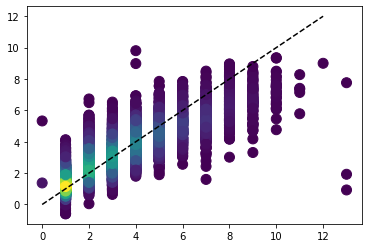

In [16]:
xy = np.vstack([y_test, y_pred])
z = sps.gaussian_kde(xy)(xy)
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, c=z, s=100)
plt.plot([0, 12], [0, 12], 'k--')
plt.show()

Mean squared error: 1.3745974128529268
Accuracy rate (exact grade match): 0.39729313003255096
Accuracy rate (within one grade): 0.8252526983039232